In [1]:
import dlsfunctions as dls
import initialization_data as init
import numpy as np
import matplotlib.pyplot as plt

In [3]:
time = init.get_log_time()
d = init.get_distance()

gamma = init.get_gamma()

mean = init.get_right_mean()

sigma = init.get_wide_sigma()

m = init.m
c = init.c
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)
noise = np.random.normal(mean, sigma, 200)*1e7

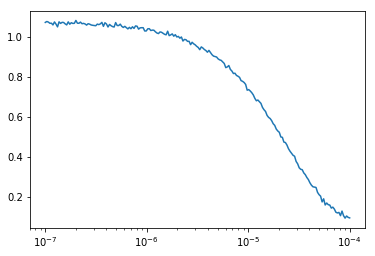

In [4]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise
plt.semilogx(time, sim_data)

In [5]:
ndim = 21
nwalkers = 100
nsteps = 1000

start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.337, 0.311, 0.362, 0.373, 0.382, 0.315, 0.357, 0.363, 0.345,
       0.343, 0.333, 0.315, 0.377, 0.353, 0.338, 0.333, 0.355, 0.362,
       0.322, 0.369, 0.331, 0.373, 0.342, 0.357, 0.353, 0.368, 0.329,
       0.353, 0.343, 0.352, 0.345, 0.343, 0.39 , 0.346, 0.359, 0.303,
       0.366, 0.363, 0.357, 0.369, 0.371, 0.34 , 0.366, 0.3  , 0.343,
       0.38 , 0.344, 0.347, 0.351, 0.382, 0.358, 0.383, 0.349, 0.336,
       0.356, 0.321, 0.358, 0.335, 0.358, 0.387, 0.358, 0.363, 0.364,
       0.362, 0.351, 0.319, 0.337, 0.353, 0.37 , 0.319, 0.343, 0.361,
       0.385, 0.309, 0.365, 0.352, 0.32 , 0.307, 0.354, 0.353, 0.378,
       0.364, 0.36 , 0.355, 0.384, 0.366, 0.356, 0.354, 0.394, 0.371,
       0.343, 0.313, 0.367, 0.312, 0.347, 0.324, 0.345, 0.357, 0.337,
       0.359])

In [6]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,315830.030037,1.007634e+06,4.214826e+06,2.963904e+07,1.709074e+08,4.783548e+08,6.649839e+08,4.618639e+08,1.612878e+08,2.962584e+07,4.300054e+06,16020.316526,70548.530897,1.008238e+06,464635.856467,115039.391169,112323.690313,852085.746847,64509.613109,218151.118077


In [7]:
infer = np.zeros(20)
infer[0] = 315830.030037
infer[1] = 1.007634e+06
infer[2] = 70548.530897
infer[3] = 1.008238e+06
infer[4] = 1464635.856467
infer[5] = 115039.391169
infer[6] = 112323.690313
infer[7] = 852085.746847
infer[8] = 64509.613109
infer[9] = 218151.118077
infer[10] = 4.214826e+06
infer[11] = 2.963904e+07
infer[12] = 1.709074e+08
infer[13] = 4.783548e+08
infer[14] = 6.649839e+08
infer[15] = 4.618639e+08
infer[16] = 1.612878e+08
infer[17] = 2.962584e+07
infer[18] = 4.300054e+06
infer[19] = 16020.316526

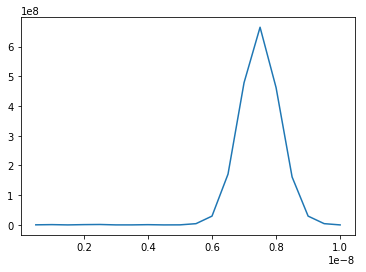

In [8]:
plt.plot(d, infer)

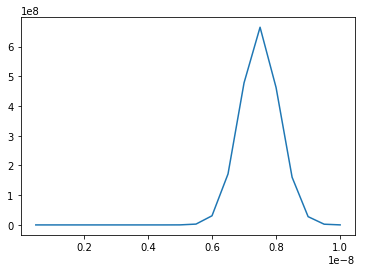

In [9]:
plt.plot(d, f)

In [10]:
beta_samples = dls.get_beta(chained_sampler, ndim)
beta_q = beta_samples.quantile([0.5], axis=0)
beta_q

,beta
0.5,1.243533


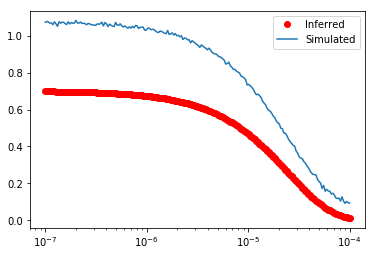

In [11]:
theta_infer = np.append(infer, 0.70079)
infer_g2 = dls.g2(theta_infer, d, m, gamma, time)
plt.semilogx(time, infer_g2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

In [ ]:
plt.plot(d, f - infer)

(array([ 349.,  317.,  824., 1127., 1627., 2708., 3097., 2435., 1534.,
         982.]),
 array([1.06349325e-03, 2.00871926e-01, 4.00680358e-01, 6.00488791e-01,
        8.00297223e-01, 1.00010566e+00, 1.19991409e+00, 1.39972252e+00,
        1.59953095e+00, 1.79933939e+00, 1.99914782e+00]),
 <a list of 10 Patch objects>)

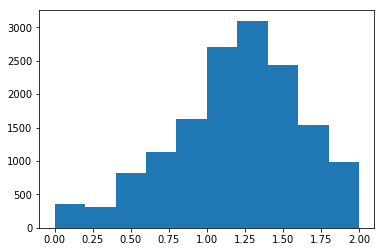

In [12]:
beta_posterior = beta_samples.values.flatten()
plt.hist(beta_posterior)